In [36]:
from IPython.display import display
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
import plotly.express as px
import plotly.graph_objs as go
import ppscore as pps
import seaborn as sns

<Figure size 1600x800 with 0 Axes>

In [37]:
pd.set_option('display.max_columns', None)

In [38]:
label_file_path = "../input/us_census_full/labels.txt"
with open(label_file_path) as f:
    names = [name.strip().replace(' ', '_') for name in f.readlines()]

In [39]:
train_path = "../input/us_census_full/census_income_learn.csv"
test_path = "../input/us_census_full/census_income_test.csv"
train = pd.read_csv(train_path, names=names, sep=", ")
test = pd.read_csv(test_path, names=names, sep=", ")

/home/justin/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:3: ParserWarning:

Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.

/home/justin/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:4: ParserWarning:

Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.



In [40]:
print("Train data size : " + str(train.shape))
print("Test data size : " + str(test.shape))

Train data size : (199523, 42)
Test data size : (99762, 42)


In [ ]:
train.sample(5)

In [ ]:
train.sample(5)

In [41]:
train["income"].loc[(train["income"] == "50000+.")] = 1
train["income"].loc[(train["income"] == "- 50000.")] = 0
test["income"].loc[(test["income"] == "50000+.")] = 1
test["income"].loc[(test["income"] == "- 50000.")] = 0

/home/justin/anaconda3/envs/tf/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [42]:
col = "income"
ratio_count = pd.DataFrame(train[col].value_counts(dropna=False))
ratio_count["ratio"] = ratio_count/ratio_count.sum()
ratio_count["counts"] = ratio_count[col]
ratio_count[col] = ratio_count.index
ratio_count.sort_values('ratio',ascending=False,inplace=True)
fig = px.bar(ratio_count, x=col, y='counts')
fig.show()
display(ratio_count)

,income,ratio,counts
0,0,0.937942,187141
1,1,0.062058,12382


## Verifying objects type data

In [43]:
def get_objects_ratios(df):
    for col in df.columns:
        dtype = str(df[col].dtype)
        if dtype == "object":
            print(col)
            ratio_count = pd.DataFrame(train[col].value_counts(dropna=False))
            ratio_count["ratio"] = ratio_count/ratio_count.sum()
            ratio_count["counts"] = ratio_count[col]
            ratio_count[col] = ratio_count.index
            ratio_count.sort_values('ratio',ascending=False,inplace=True)
            fig = px.bar(ratio_count, x=col, y='counts')
            fig.show()
            display(ratio_count)

class_of_worker -> categorical<br/>
education -> ordinal?<br/>
enroll_in_edu_inst_last_wk -> categorical<br/>
marital_stat -> categorical<br/>
major_industry_code -> categorical
major_occupation_code -> categorical<br/>
race -> categorical<br/>
hispanic_origin -> categorical<br/>
sex -> categorical<br/>
member_of_a_labor_union -> categorical<br/>
reason_for_unemployment -> categorical<br/>
full_or_part_time_employment_stat -> categorical<br/>
tax_filer_status -> categorical<br/>
region_of_previous_residence -> categorical<br/>
state_of_previous_residence -> categorical, **Not in universe & ?**<br/>
detailed_household_and_family_stat -> categorical<br/>
migration_code-change_in_msa -> categorical, **Not in universe & Not identifiable & ?**<br/>
migration_code-change_in_reg -> categorical, **Not in universe & ?**<br/>
migration_code-move_within_reg -> categorical, **Not in universe & ?**<br/>
live_in_this_house_1_year_ago -> categorical<br/>
migration_prev_res_in_sunbelt -> categorical, **Not in universe & ?**<br/>
family_members_under_18 -> categorical<br/>
country_of_birth_father -> categorical<br/>
country_of_birth_mother -> categorical<br/>
country_of_birth_self -> categorical<br/>
citizenship -> categorical<br/>
fill_inc_questionnaire_for_veteran's_admin -> categorical<br/>
income -> categorical<br/>

In [ ]:
get_objects_ratios(train)

In [ ]:
get_objects_ratios(test)

In [44]:
# replace 'Not in universe', 'Not identifiable' and '?' by null
train.replace("Not in universe", np.nan, inplace=True)
train.replace("Not identifiable", np.nan, inplace=True)
train.replace("?", np.nan, inplace=True)

In [45]:
def missing_data(df):
    total = df.isnull().sum()
    percent = (df.isnull().sum()/df.shape[0]*100)
    missing_values = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in df.columns:
        dtype = str(df[col].dtype)
        types.append(dtype)
    missing_values["Types"] = types
    missing_values.sort_values('Total',ascending=False,inplace=True)
    return(missing_values)
missing_datas = missing_data(train)

In [46]:
missing_datas

,Total,Percent,Types
fill_inc_questionnaire_for_veteran's_admin,197539,99.005628,object
reason_for_unemployment,193453,96.957744,object
enroll_in_edu_inst_last_wk,186943,93.694962,object
state_of_previous_residence,184458,92.449492,object
region_of_previous_residence,183750,92.094646,object
migration_prev_res_in_sunbelt,183750,92.094646,object
member_of_a_labor_union,180459,90.445212,object
family_members_under_18,144232,72.288408,object
migration_code-change_in_msa,101642,50.942498,object
migration_code-move_within_reg,101212,50.726984,object


Columns with too much missing data:<br/>

In [47]:
empty_cols = missing_datas[missing_datas["Percent"] >= 51].index
print(empty_cols)

Index(['fill_inc_questionnaire_for_veteran's_admin', 'reason_for_unemployment',
       'enroll_in_edu_inst_last_wk', 'state_of_previous_residence',
       'region_of_previous_residence', 'migration_prev_res_in_sunbelt',
       'member_of_a_labor_union', 'family_members_under_18'],
      dtype='object')


## Verifying continuous data

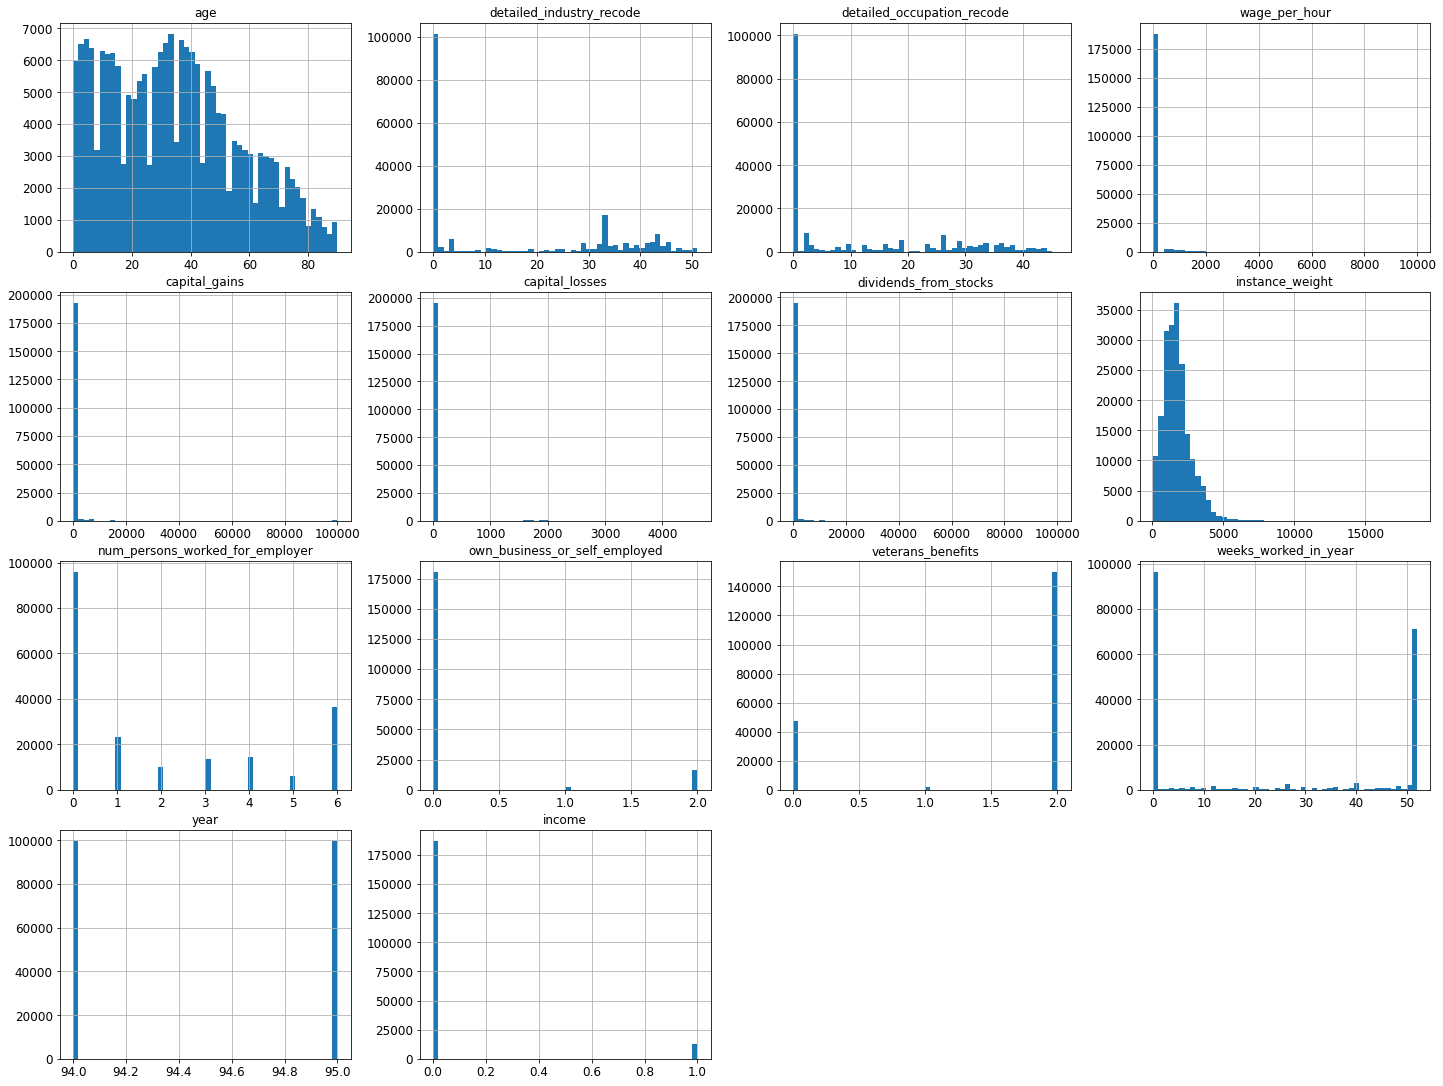

In [13]:
train.select_dtypes(exclude=["object"]).hist(bins=50, figsize=(20,15))
plt.tight_layout(pad=0.4)
plt.show()

### Correlation matrices

<AxesSubplot:>

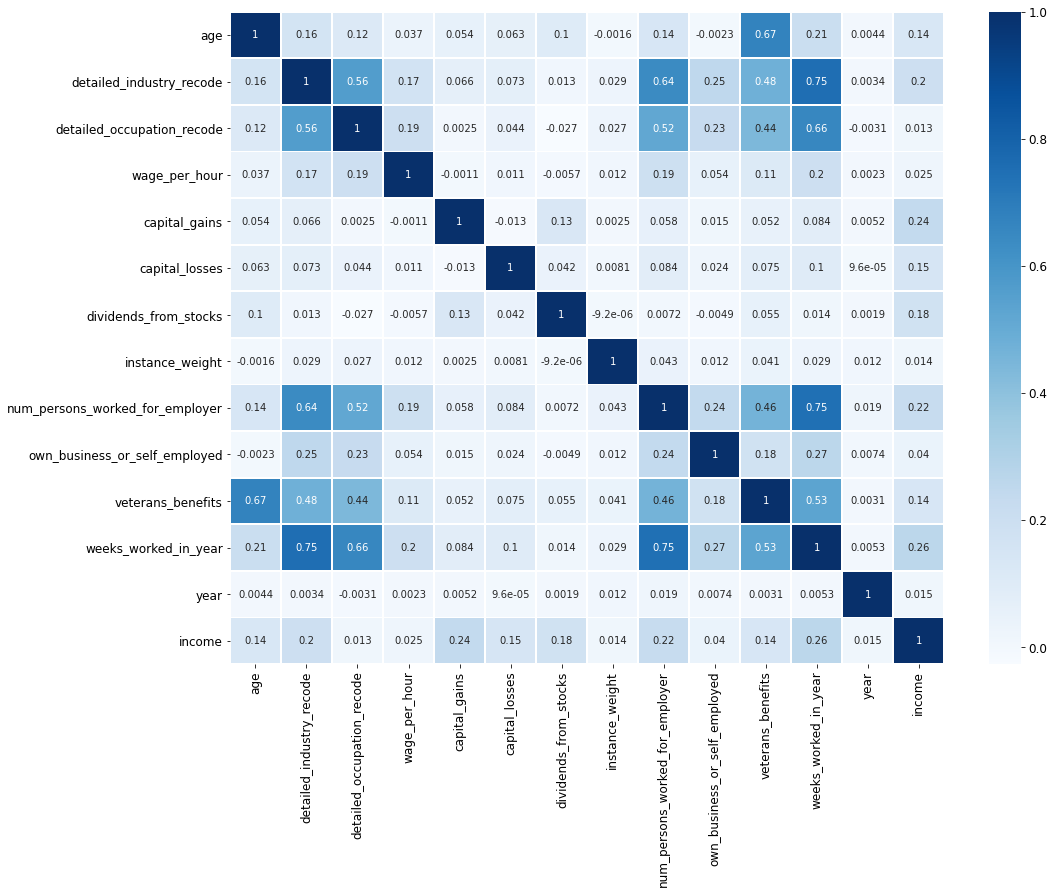

In [14]:
plt.figure(figsize=(16,12))
sns.heatmap(train.corr(), cmap="Blues", linewidths=0.75, annot=True)

## Feature comparisons

In [48]:
train_sup = train[train["income"] == 1]
train_inf = train[train["income"] == 0]

In [49]:
def show_feature_comparison(col):
    train_sup_col = train_sup[col].value_counts()
    train_sup_col = pd.DataFrame({col:train_sup_col.index, 'count':train_sup_col.values})

    train_inf_col = train_inf[col].value_counts()
    train_inf_col = pd.DataFrame({col:train_inf_col.index, 'count':train_inf_col.values})

    pie_sup = go.Pie(  
       labels = train_sup_col[col],
       values = train_sup_col["count"],
       domain=dict(x=[0, 0.5]),
       name="Above 50k",
       hole = 0.5,
       marker = dict(colors=['violet', 'cornflowerblue'], line=dict(color='#000000', width=2))
    )

    pie_inf = go.Pie(  
       labels = train_inf_col[col],
       values = train_inf_col["count"],
       domain=dict(x=[0.5, 1.0]), 
       name="Below 50k",
       hole = 0.5,
       marker = dict(colors=['cornflowerblue', 'violet'], line=dict(color='#000000', width=2))
    )

    data = [pie_sup, pie_inf]

    layout = go.Layout(
        paper_bgcolor='rgba(0,0,0,0)',
        plot_bgcolor='rgba(0,0,0,0)',
        title=col + ' percentage from +50k vs -50k',
        annotations=[dict(text="Above 50k", x=0.18, y=0.5, font_size=15, showarrow=False),
                     dict(text="Below 50k", x=0.85, y=0.5, font_size=15, showarrow=False)]
    )

    fig = go.Figure(data=data, layout=layout)

    fig.show()

In [ ]:
show_feature_comparison("sex")

In [ ]:
show_feature_comparison("race")

In [51]:
def feature_transform(df, empty_cols):
    
    # Droping empty column
    df.drop(empty_cols, axis=1, inplace=True)

    # Creating a categorical variable for age
    df["ageCat"] = ""
    df["ageCat"].loc[(df["age"] < 18)] = 'young'
    df["ageCat"].loc[(df["age"] >= 18) & (df["age"] < 56)] = 'mature'
    df["ageCat"].loc[(df["age"] >= 56)] = 'senior'
    
    # Creating a categorical variable for hispanic origin
    df["hispanicCat"] = 1
    df["hispanicCat"].loc[(df["hispanic_origin"] == "All other")] = 0
    df["hispanicCat"].loc[(df["hispanic_origin"].isna())] = 0
    
    # Creating a categorical variable to tell if the passenger is a Young/Mature/Senior male or a Young/Mature/Senior female
    df["SexCat"] = ""
    df["SexCat"].loc[(df["sex"] == "Male") & (df["age"] <= 21)] = "youngmale"
    df["SexCat"].loc[(df["sex"] == "Male") & ((df["age"] > 21) & (df["age"]) < 50)] = "maturemale"
    df["SexCat"].loc[(df["sex"] == "Male") & (df["age"] > 50)] = "seniormale"
    df["SexCat"].loc[(df["sex"] == "Female") & (df["age"] <= 21)] = "youngfemale"
    df["SexCat"].loc[(df["sex"] == "Female") & ((df["age"] > 21) & (df["age"]) < 50)] = "maturefemale"
    df["SexCat"].loc[(df["sex"] == "Female") & (df["age"] > 50)] = "seniorfemale"
    
    # Dropping unused columns from the feature set
    df.drop(["hispanic_origin"], axis=1, inplace=True)
    
    target = df["income"]
    df.drop(["income"], axis=1, inplace=True)
    
    # Splitting categorical and numerical column dataframes
    categorical_df = df.select_dtypes(include=['object'])
    numeric_df = df.select_dtypes(exclude=['object'])
    
    # And then, storing the names of categorical and numerical columns.
    categorical_columns = list(categorical_df.columns)
    numeric_columns = list(numeric_df.columns)
    
    print("Categorical columns:\n", categorical_columns)
    print("\nNumeric columns:\n", numeric_columns)

    return df, target, categorical_columns, numeric_columns

In [52]:
df, target, categorical_columns, numeric_columns = feature_transform(train, empty_cols)

/home/justin/anaconda3/envs/tf/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/justin/anaconda3/envs/tf/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/justin/anaconda3/envs/tf/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/justin/anaconda3/envs/tf/lib/py

Categorical columns:
 ['class_of_worker', 'education', 'marital_stat', 'major_industry_code', 'major_occupation_code', 'race', 'sex', 'full_or_part_time_employment_stat', 'tax_filer_status', 'detailed_household_and_family_stat', 'detailed_household_summary_in_household', 'migration_code-change_in_msa', 'migration_code-change_in_reg', 'migration_code-move_within_reg', 'live_in_this_house_1_year_ago', 'country_of_birth_father', 'country_of_birth_mother', 'country_of_birth_self', 'citizenship', 'ageCat', 'SexCat']

Numeric columns:
 ['age', 'detailed_industry_recode', 'detailed_occupation_recode', 'wage_per_hour', 'capital_gains', 'capital_losses', 'dividends_from_stocks', 'instance_weight', 'num_persons_worked_for_employer', 'own_business_or_self_employed', 'veterans_benefits', 'weeks_worked_in_year', 'year', 'hispanicCat']


In [61]:
from category_encoders import OneHotEncoder
from scipy import stats
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedShuffleSplit
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, StackingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [62]:
# Function responsible for checking our model's performance on the test data
def testSetResultsClassifier(classifier, x_test, y_test):
    predictions = classifier.predict(x_test)
    
    results = []
    f1 = f1_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    roc_auc = roc_auc_score(y_test, predictions)
    accuracy = accuracy_score(y_test, predictions)
    
    results.append(f1)
    results.append(precision)
    results.append(recall)
    results.append(roc_auc)
    results.append(accuracy)
    
    print("\n\n#---------------- Test set results (Best Classifier) ----------------#\n")
    print("F1 score, Precision, Recall, ROC_AUC score, Accuracy:")
    print(results)
    
    return results

In [63]:
def defineBestModelPipeline(df, target, categorical_columns, numeric_columns):
    
    x_train, x_test, y_train, y_test = train_test_split(df, target, test_size=0.10, random_state=42)
    y_train = y_train.to_numpy()
    y_test = y_test.to_numpy()
    
    # # Obtaining balanced data for modeling using Random Under Sampling
    #x_train, y_train = balancingClassesRus(x_train, y_train)

    # # Obtaining balanced data for modeling using SMOTEENN
    #x_train, y_train = balancingClassesSmoteenn(x_train, y_train)

    # # Obtaining balanced data for modeling using SMOTE
    #x_train, y_train = balancingClassesSmote(x_train, y_train)
    
    
    #Numeric Transformers
    numeric_transformer_1 = Pipeline(steps=[('imp', IterativeImputer(max_iter=30, random_state=42)),
                                            ('scaler', MinMaxScaler())])
    
    numeric_transformer_2 = Pipeline(steps=[('imp', IterativeImputer(max_iter=20, random_state=42)),
                                            ('scaler', StandardScaler())])
    
    numeric_transformer_3 = Pipeline(steps=[('imp', SimpleImputer(strategy='mean')),
                                            ('scaler', MinMaxScaler())])
    
    numeric_transformer_4 = Pipeline(steps=[('imp', SimpleImputer(strategy='median')),
                                            ('scaler', StandardScaler())])
    
    
    #Categorical Transformer
    categorical_transformer = Pipeline(steps=[('frequent', SimpleImputer(strategy='most_frequent')),
                                              ('onehot', OneHotEncoder(use_cat_names=True))])
    
    
    #Combining both numerical and categorical pipelines
    data_transformations_1 = ColumnTransformer(transformers=[('num', numeric_transformer_1, numeric_columns),
                                                             ('cat', categorical_transformer, categorical_columns)])
    
    data_transformations_2 = ColumnTransformer(transformers=[('num', numeric_transformer_2, numeric_columns),
                                                             ('cat', categorical_transformer, categorical_columns)])
    
    data_transformations_3 = ColumnTransformer(transformers=[('num', numeric_transformer_3, numeric_columns),
                                                             ('cat', categorical_transformer, categorical_columns)])
    
    data_transformations_4 = ColumnTransformer(transformers=[('num', numeric_transformer_4, numeric_columns),
                                                             ('cat', categorical_transformer, categorical_columns)])
    
    
    # Define the Pipeline
    pipe = Pipeline(steps=[('data_transformations', data_transformations_1),
                           ('feature_eng', PCA()),
                           ('clf', SVC())])
                           #memory='cache_folder')
    
    
    # Use RandomSearchCV
    params_grid = [
                    {'data_transformations': [data_transformations_1, data_transformations_2, data_transformations_3, data_transformations_4],
                     'feature_eng': [None, 
                                     PCA(n_components=round(x_train.shape[1]*0.9)),
                                     PCA(n_components=round(x_train.shape[1]*0.8)),
                                     PCA(n_components=round(x_train.shape[1]*0.7)),
                                     PolynomialFeatures(degree=2), PolynomialFeatures(degree=3)],
                     'clf': [KNeighborsClassifier()],
                     'clf__n_neighbors': stats.randint(1, 50),
                     'clf__metric': ['minkowski', 'euclidean']},

        

                    {'data_transformations': [data_transformations_1, data_transformations_2, data_transformations_3, data_transformations_4],
                     'feature_eng': [None, 
                                     PCA(n_components=round(x_train.shape[1]*0.9)),
                                     PCA(n_components=round(x_train.shape[1]*0.8)),
                                     PCA(n_components=round(x_train.shape[1]*0.7)),
                                     PolynomialFeatures(degree=2), PolynomialFeatures(degree=3)],
                     'clf': [LogisticRegression()],
                     'clf__penalty': ['l1', 'l2'],
                     'clf__C': stats.uniform(0.01, 10)},


        
                    {'data_transformations': [data_transformations_1, data_transformations_2, data_transformations_3, data_transformations_4],
                     'feature_eng': [None, 
                                     PCA(n_components=round(x_train.shape[1]*0.9)),
                                     PCA(n_components=round(x_train.shape[1]*0.8)),
                                     PCA(n_components=round(x_train.shape[1]*0.7)),
                                     PolynomialFeatures(degree=2), PolynomialFeatures(degree=3)],
                     'clf': [SVC()],
                     'clf__C': stats.uniform(0.1, 10),
                     'clf__gamma': stats.uniform(0.1, 10)},


        
                    {'data_transformations': [data_transformations_1, data_transformations_2, data_transformations_3, data_transformations_4],
                     'feature_eng': [None, 
                                     PCA(n_components=round(x_train.shape[1]*0.9)),
                                     PCA(n_components=round(x_train.shape[1]*0.8)),
                                     PCA(n_components=round(x_train.shape[1]*0.7)),
                                     PolynomialFeatures(degree=2), PolynomialFeatures(degree=3)],
                     'clf': [DecisionTreeClassifier()],
                     'clf__criterion': ['gini', 'entropy'],
                     'clf__max_features': [None, "auto", "log2"],
                     'clf__max_depth': [None, stats.randint(1, 5)]},


        
                    {'data_transformations': [data_transformations_1, data_transformations_2, data_transformations_3, data_transformations_4],
                     'feature_eng': [None, 
                                     PCA(n_components=round(x_train.shape[1]*0.9)),
                                     PCA(n_components=round(x_train.shape[1]*0.8)),
                                     PCA(n_components=round(x_train.shape[1]*0.7)),
                                     PolynomialFeatures(degree=2), PolynomialFeatures(degree=3)],
                     'clf': [RandomForestClassifier()],
                     'clf__n_estimators': stats.randint(10, 175),
                     'clf__max_features': [None, "auto", "log2"],
                     'clf__max_depth': [None, stats.randint(1, 5)],
                     'clf__random_state': stats.randint(1, 49)},
        
                    
        
                    {'data_transformations': [data_transformations_1, data_transformations_2, data_transformations_3, data_transformations_4],
                     'feature_eng': [None, 
                                     PCA(n_components=round(x_train.shape[1]*0.9)),
                                     PCA(n_components=round(x_train.shape[1]*0.8)),
                                     PCA(n_components=round(x_train.shape[1]*0.7)),
                                     PolynomialFeatures(degree=2), PolynomialFeatures(degree=3)],
                     'clf': [ExtraTreesClassifier()],
                     'clf__n_estimators': stats.randint(10, 150),
                     'clf__max_features': [None, "auto", "log2"],
                     'clf__max_depth': [None, stats.randint(1, 6)]},

                    
        
                    {'data_transformations': [data_transformations_1, data_transformations_2, data_transformations_3, data_transformations_4],
                     'feature_eng': [None, 
                                     PCA(n_components=round(x_train.shape[1]*0.9)),
                                     PCA(n_components=round(x_train.shape[1]*0.8)),
                                     PCA(n_components=round(x_train.shape[1]*0.7)),
                                     PolynomialFeatures(degree=2), PolynomialFeatures(degree=3)],
                     'clf': [GradientBoostingClassifier()],
                     'clf__n_estimators': stats.randint(10, 100),
                     'clf__learning_rate': stats.uniform(0.01, 0.7),
                     'clf__max_depth': [None, stats.randint(1, 6)]},

        
        
                    {'data_transformations': [data_transformations_1, data_transformations_2, data_transformations_3, data_transformations_4],
                     'feature_eng': [None, 
                                     PCA(n_components=round(x_train.shape[1]*0.9)),
                                     PCA(n_components=round(x_train.shape[1]*0.8)),
                                     PCA(n_components=round(x_train.shape[1]*0.7)),
                                     PolynomialFeatures(degree=2), PolynomialFeatures(degree=3)],
                     'clf': [LGBMClassifier()],
                     'clf__n_estimators': stats.randint(1, 100),
                     'clf__learning_rate': stats.uniform(0.01, 0.7),
                     'clf__max_depth': [None, stats.randint(1, 6)]},


        
                    {'data_transformations': [data_transformations_1, data_transformations_2, data_transformations_3, data_transformations_4],
                     'feature_eng': [None, 
                                     PCA(n_components=round(x_train.shape[1]*0.9)),
                                     PCA(n_components=round(x_train.shape[1]*0.8)),
                                     PCA(n_components=round(x_train.shape[1]*0.7)),
                                     PolynomialFeatures(degree=2), PolynomialFeatures(degree=3)],
                     'clf': [XGBClassifier()],
                     'clf__n_estimators': stats.randint(5, 125),
                     'clf__eta': stats.uniform(0.01, 1),
                     'clf__max_depth': [None, stats.randint(1, 6)],
                     'clf__gamma': stats.uniform(0.01, 1)},


        
                    {'data_transformations': [data_transformations_1, data_transformations_2, data_transformations_3, data_transformations_4],
                     'feature_eng': [None, 
                                     PCA(n_components=round(x_train.shape[1]*0.9)),
                                     PCA(n_components=round(x_train.shape[1]*0.8)),
                                     PCA(n_components=round(x_train.shape[1]*0.7)),
                                     PolynomialFeatures(degree=2), PolynomialFeatures(degree=3)],
                     'clf': [StackingClassifier(estimators=[('svc', SVC(C=1, gamma=1)),
                                                            ('rf', RandomForestClassifier(max_depth=5, n_estimators=50, n_jobs=-1, random_state=28)),
                                                            ('xgb', XGBClassifier(eta=0.6, gamma=0.7, max_depth=None, n_estimators=30))], 
                                                final_estimator=LogisticRegression(C=1))]},
   
   
        
                    {'data_transformations': [data_transformations_1, data_transformations_2, data_transformations_3, data_transformations_4],
                     'feature_eng': [None, 
                                     PCA(n_components=round(x_train.shape[1]*0.9)),
                                     PCA(n_components=round(x_train.shape[1]*0.8)),
                                     PCA(n_components=round(x_train.shape[1]*0.7)),
                                     PolynomialFeatures(degree=2), PolynomialFeatures(degree=3)],
                     'clf': [VotingClassifier(estimators=[('gbt', GradientBoostingClassifier(learning_rate=0.8, max_depth=None, n_estimators=30)),
                                                          ('lgbm', LGBMClassifier(n_estimators=30, learning_rate=0.6, max_depth=None)),
                                                          ('xgb', XGBClassifier(eta=0.8, gamma=0.8, max_depth=None, n_estimators=40))],
                                              voting='soft')]}
                ]
    
    metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
    
    cross_validator = StratifiedShuffleSplit(n_splits=10, train_size=0.8, test_size=0.2, random_state=7)
    
    best_model_pipeline = RandomizedSearchCV(estimator=pipe, param_distributions=params_grid, 
                                             n_iter=100, scoring=metrics, refit='accuracy', 
                                             n_jobs=-1, cv=cross_validator, random_state=21)

    best_model_pipeline.fit(x_train, y_train)
    
    
    # Results
    print("\n\n#---------------- Best Data Pipeline found in RandomSearchCV  ----------------#\n\n", best_model_pipeline.best_estimator_[0])
    print("\n\n#---------------- Best Feature Engineering technique found in RandomSearchCV  ----------------#\n\n", best_model_pipeline.best_estimator_[1])
    print("\n\n#---------------- Best Classifier found in RandomSearchCV  ----------------#\n\n", best_model_pipeline.best_estimator_[2])
    print("\n\n#---------------- Best Estimator's average Accuracy Score on CV (validation set) ----------------#\n\n", best_model_pipeline.best_score_)
    
    return x_train, x_test, y_train, y_test, best_model_pipeline

In [ ]:
x_train, x_test, y_train, y_test, best_model_pipeline = defineBestModelPipeline(df, target, categorical_columns, numeric_columns)

In [ ]:
test_set_results = testSetResultsClassifier(best_model_pipeline, x_test, y_test)

In [ ]:
df_results = pd.DataFrame(best_model_pipeline.cv_results_)

display(df_results)

In [ ]:
display(df_results[df_results['rank_test_accuracy'] == 1])

## Predictions

In [ ]:
df_test, target, categorical_columns, numeric_columns = feature_transform(train, empty_cols)

In [ ]:
test_predictions = best_model_pipeline.predict(df_test)
print(test_predictions)